## Exercise 1
### 1.)

-1

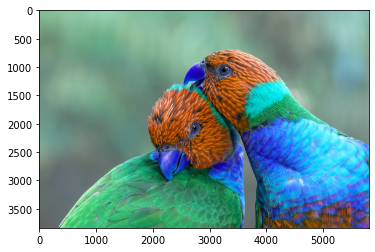

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('./img/birds.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

hsv = image.copy()
hsi = image.copy()
# for i, row in enumerate(image):
    # for j, pixel in enumerate(row):
        # hsi[i, j] = np.mean(pixel)
        # hsv[i, j] = np.max(pixel)

plt.imshow(image)
plt.axis('off')
cv.waitKey(0)